<H1 align="center">Likelihood Ratio Test for Membership Inference Attack on Beacon Data</H1>

<br>
<strong> This notebook performs likelihood ratio test-based membership inference attacks on Beacon data for multiple sequence lengths. </strong>

## 1. Importing Required Libraries

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, \
    roc_curve

from src.utils_attacker_lrt import likelihood_ratio_statistic_beacon_optimized, \
    likelihood_ratio_test_threshold, likelihood_ratio_test
from src.utils_io import read_bitarrays
from src.utils_plot import plot_likelihood_ratio_statistics, \
    plot_receiver_operating_characteristics_curve, plot_likelihood_ratio_test_hyper_num_snps

## 2. Setting Parameters

In [ ]:
false_positive_rate = 0.05
num_snps_space = [10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000]

## 3. Setting Environment Variables

In [3]:
plot_dir = "../plots/lrt/beacon/"
plot_name_lrt = "likelihood_ratio_statistics"
plot_title_lrt = "Likelihood Ratio Statistics: Beacon"
plot_name_roc = "roc_curve"
plot_title_roc = "AUROC: Beacon"

## 4. Initializing Evaluation Metrics

In [4]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []
roc_auc_scores = []

## 5. Performing Likelihood Ratio Test

In [5]:
for num_snps in num_snps_space:
    print("=" * 25)
    print(f"Number of SNPs: {num_snps}")
    # Load the data
    genomes_beacon = read_bitarrays("../data/test/In_Pop.pkl")[:, :num_snps]
    genomes_reference = read_bitarrays("../data/test/Not_In_Pop.pkl")[:, :num_snps]
    genomes = np.concatenate((genomes_beacon, genomes_reference), axis=0)
    # Compute the labels
    labels_beacon = np.ones(genomes_beacon.shape[0], dtype=bool)
    labels_reference = np.zeros(genomes_reference.shape[0], dtype=bool)
    labels = np.concatenate((labels_beacon, labels_reference), axis=0)
    # Compute the beacon responses and reference frequencies
    minor_allele_presences_beacon = np.any(genomes_beacon, axis=0)
    minor_allele_frequencies_reference = np.mean(genomes, axis=0)
    # Compute the likelihood ratio statistics
    likelihood_ratio_statistics_beacon = likelihood_ratio_statistic_beacon_optimized(
        target_genomes=genomes_beacon,
        beacon_presences=minor_allele_presences_beacon,
        reference_frequencies=minor_allele_frequencies_reference,
        num_beacon_genomes=genomes_beacon.shape[0])
    likelihood_ratio_statistics_reference = likelihood_ratio_statistic_beacon_optimized(
        target_genomes=genomes_reference,
        beacon_presences=minor_allele_presences_beacon,
        reference_frequencies=minor_allele_frequencies_reference,
        num_beacon_genomes=genomes_beacon.shape[0])
    likelihood_ratio_statistics = np.concatenate(
        (likelihood_ratio_statistics_beacon, likelihood_ratio_statistics_reference), axis=0)
    # Compute the threshold
    threshold = likelihood_ratio_test_threshold(
        likelihood_ratio_statistics=likelihood_ratio_statistics,
        labels=labels,
        false_positive_rate=false_positive_rate)
    # Plot the likelihood ratio statistics
    plot_likelihood_ratio_statistics(likelihood_ratio_statistics=likelihood_ratio_statistics,
                                     membership_labels=labels,
                                     threshold=threshold,
                                     title=plot_title_lrt,
                                     output_file=f"{plot_dir}{plot_name_lrt}_{num_snps}.png",
                                     show=False)
    # Perform the likelihood ratio test
    inverted = np.mean(likelihood_ratio_statistics_beacon) < np.mean(
        likelihood_ratio_statistics_reference)
    predicted = likelihood_ratio_test(likelihood_ratio_statistics=likelihood_ratio_statistics,
                                      threshold=threshold,
                                      inverted=inverted)
    # Compute the evaluation metrics
    accuracy = accuracy_score(labels, predicted)
    precision = precision_score(labels, predicted)
    recall = recall_score(labels, predicted)
    f1 = f1_score(labels, predicted)
    roc_auc = roc_auc_score(labels, 1 - likelihood_ratio_statistics)
    # Print the evaluation metrics
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1: {f1:.2f}")
    print(f"AUROC: {roc_auc:.2f}")
    # Append the evaluation metrics
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)
    roc_auc_scores.append(roc_auc)
    # Plot the ROC curve
    fpr, tpr, _ = roc_curve(labels, 1 - likelihood_ratio_statistics)
    plot_receiver_operating_characteristics_curve(true_positive_rates=tpr,
                                                  false_positive_rates=fpr,
                                                  auc=roc_auc,
                                                  title=plot_title_roc,
                                                  output_file=f"{plot_dir}{plot_name_roc}_{num_snps}.png",
                                                  show=False)

Number of SNPs: 10000
Accuracy: 0.59
Precision: 0.83
Recall: 0.24
F1: 0.37
ROC AUC: 0.78
Number of SNPs: 20000
Accuracy: 0.65
Precision: 0.88
Recall: 0.35
F1: 0.50
ROC AUC: 0.87
Number of SNPs: 30000
Accuracy: 0.72
Precision: 0.91
Recall: 0.49
F1: 0.64
ROC AUC: 0.94
Number of SNPs: 40000
Accuracy: 0.89
Precision: 0.94
Recall: 0.82
F1: 0.88
ROC AUC: 0.97
Number of SNPs: 50000
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1: 0.95
ROC AUC: 0.98
Number of SNPs: 60000
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1: 0.97
ROC AUC: 0.99
Number of SNPs: 70000
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1: 0.98
ROC AUC: 0.99
Number of SNPs: 80000
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1: 0.98
ROC AUC: 1.00
Number of SNPs: 90000
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1: 0.98
ROC AUC: 1.00
Number of SNPs: 100000
Accuracy: 0.97
Precision: 0.95
Recall: 1.00
F1: 0.98
ROC AUC: 1.00


## 6. Plotting the Evaluation Metrics

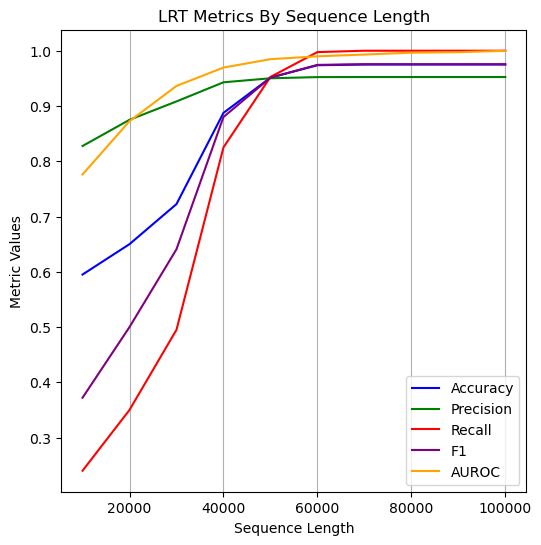

In [6]:
# Plot the evaluation metrics
plot_likelihood_ratio_test_hyper_num_snps(num_snps=num_snps_space,
                                          acc=accuracy_scores,
                                          prec=precision_scores,
                                          rec=recall_scores,
                                          f1=f1_scores,
                                          roc_auc=roc_auc_scores,
                                          title="LRT Metrics By Sequence Length",
                                          output_file=f"{plot_dir}lrt_metrics_by_num_snps.png",
                                          show=True)